In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [68]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [69]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.shape

(42000, 785)

In [71]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


To show the image

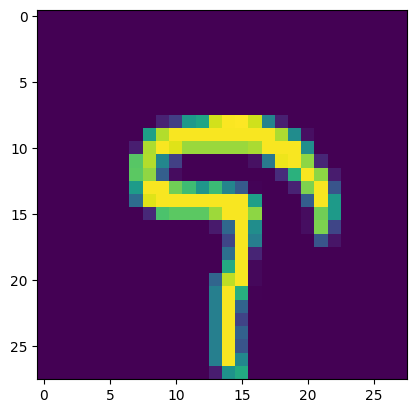

In [72]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[34574,1:].values.reshape(28,28))

In [73]:
x = df.drop(columns=['label'])
y = df['label']

In [74]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
x_train.shape

(33600, 784)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred = knn.predict(x_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

Now performing PCA to gain almost the same accuracy but with less number of input columns

In [ ]:
# Step 1 - Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100) #how many principal components you want

In [ ]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
# now the data is in transformed co-ordinate system

In [ ]:
x_train_trf.shape

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

In [ ]:
y_pred = knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_pred,y_test)*100

With 784 columns accuracy was 96%

now with 100 columns accuracy is 95%

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200) 

x_train_trf1 = pca.fit_transform(x_train)
x_test_trf1 = pca.transform(x_test)

knn.fit(x_train_trf1,y_train)
y_pred = knn.predict(x_test_trf1)

accuracy_score(y_pred,y_test)*100
# With 200 columns also accuracy is 95%

In [ ]:
# This will print all the accuracy % with respect to principal component from 1 to 784
for i in range(1,784):
    pca = PCA(n_components = i) 
    x_train_trf1 = pca.fit_transform(x_train)
    x_test_trf1 = pca.transform(x_test)
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf1,y_train)
    y_pred = knn.predict(x_test_trf1)
    print(accuracy_score(y_pred,y_test)*100)


Data visualizing

In [84]:
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [85]:
x_train_trf

array([[-226.60454624,  305.88365323],
       [  38.33576097, -461.09799977],
       [-305.49155705, -351.67926186],
       ...,
       [ -28.00099554,  596.04920515],
       [ 233.97128304,   18.63196056],
       [1096.50417832, -254.72667071]])

In [86]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [87]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [88]:
x_train_trf

array([[-226.60518854,  305.89184886,  417.19369259],
       [  38.33593876, -461.10858467,  100.46274295],
       [-305.49239535, -351.6799515 , -961.31764482],
       ...,
       [ -28.00091579,  596.04064247,  606.33760159],
       [ 233.96972252,   18.6665685 , -148.33861094],
       [1096.50347927, -254.71496918, -560.37731458]])

In [89]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_trf[:,0], y=x_train_trf[:,1], z=x_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()